## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
diabetes = datasets.load_diabetes()
print("Input dimension: ", diabetes.data.shape)
print("Input data type: ", type(diabetes.data))
print("Target dimension: ", diabetes.target.shape)
print("Target data type: ", type(diabetes.target))

Input dimension:  (442, 10)
Input data type:  <class 'numpy.ndarray'>
Target dimension:  (442,)
Target data type:  <class 'numpy.ndarray'>


In [3]:
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:361]
diabetes_y_train = diabetes.target[:361]

diabetes_X_test = diabetes_X[362:]
diabetes_y_test = diabetes.target[362:]
print(diabetes_X_train.shape, diabetes_y_train.shape, diabetes_X_test.shape, diabetes_y_test.shape)

(361, 10) (361,) (80, 10) (80,)


## Define model

In [4]:
from my_dnn import model, optimizers, loss, metrics
my_model = model.SimpleMlp(layer_dims=[10, 20, 20, 10, 1], output_activation='linear')

## Compile model

In [5]:
my_model.compile(optimizer = optimizers.Adam(learning_rate= 0.005), loss=loss.MSE(), metrics=metrics.RMSE())

## Train model

In [6]:
my_model.fit(diabetes_X_train, diabetes_y_train, validation_data = (diabetes_X_test, diabetes_y_test), epochs=50, batch_size=32, verbose=1)

Epoch 0 Cost: 28940.117502305064 Eval: 169.4968055311586 Val Cost: 29092.58428928848 Val Eval: 170.23594917867885
Epoch 1 Cost: 28615.289971199712 Eval: 168.7970025649248 Val Cost: 28532.825575398594 Val Eval: 168.4636026519354
Epoch 2 Cost: 27725.554874012676 Eval: 166.0849941907425 Val Cost: 27053.084115840098 Val Eval: 164.22506821610864
Epoch 3 Cost: 25504.11777488195 Eval: 159.2957508494754 Val Cost: 23630.981417490773 Val Eval: 153.35038469046356
Epoch 4 Cost: 20879.909857276718 Eval: 143.5129776935768 Val Cost: 17122.2016630122 Val Eval: 130.20752391320138
Epoch 5 Cost: 13192.937197706004 Eval: 113.75755729273024 Val Cost: 8515.735855520852 Val Eval: 91.35292821830986
Epoch 6 Cost: 6068.58702697649 Eval: 77.26451924300756 Val Cost: 4704.621636287786 Val Eval: 68.34277570939088
Epoch 7 Cost: 4669.467671536298 Eval: 68.09943983260615 Val Cost: 4503.916308694019 Val Eval: 67.10973304519686
Epoch 8 Cost: 4175.50321364393 Eval: 64.27582766632109 Val Cost: 4067.6210756554983 Val Eval:

## Plot results

In [7]:
history = my_model.get_history()

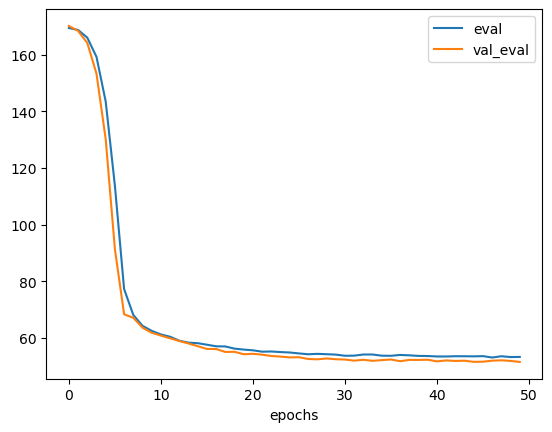

In [8]:
# plt.plot(np.squeeze(my_model.get_costs()), label='cost')
plt.plot(np.squeeze(history['eval']), label='eval')
plt.plot(np.squeeze(history['val_eval']), label='val_eval')
plt.xlabel('epochs')
# plt.title("Learning rate =" + str(learning_rate))
plt.legend()
plt.show()

In [9]:
y_pred_linear = my_model.predict(diabetes_X_test[0:1, :])
print("Gia tri du doan cho mô hình linear regression: ", y_pred_linear)

Gia tri du doan cho mô hình linear regression:  [[234.23196499]]


In [10]:
diabetes_y_pred = my_model.predict(diabetes_X_test)
diabetes_y_test = np.array(diabetes_y_test)
diabetes_y_pred = np.array(diabetes_y_pred).reshape(diabetes_y_test.shape)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Labels", "Predictions", "Dif"])

,Labels,Predictions,Dif
0,321.0,234.231965,86.768035
1,58.0,156.427485,98.427485
2,262.0,158.039496,103.960504
3,206.0,162.464089,43.535911
4,233.0,253.978218,20.978218
...,...,...,...
75,178.0,189.540748,11.540748
76,104.0,103.672953,0.327047
77,132.0,122.167838,9.832162
78,220.0,203.465376,16.534624


In [11]:
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

51.95417486239047